# In Depth A/B Testing - Lab

## Introduction

In this lab, you'll explore a survey from Kaggle regarding budding data scientists. With this, you'll form some initial hypotheses, and test them using the tools you've acquired to date. 

## Objectives

You will be able to:

* Conduct t-tests and an ANOVA on a real-world dataset and interpret the results

## Load the Dataset and Perform a Brief Exploration

The data is stored in a file called **multipleChoiceResponses_cleaned.csv**. Feel free to check out the original dataset referenced at the bottom of this lab, although this cleaned version will undoubtedly be easier to work with. Additionally, meta-data regarding the questions is stored in a file name **schema.csv**. Load in the data itself as a Pandas DataFrame, and take a moment to briefly get acquainted with it.

> Note: If you can't get the file to load properly, try changing the encoding format as in `encoding='latin1'`

In [1]:
#Your code here
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [2]:
df = pd.read_csv('multipleChoiceResponses_cleaned.csv', encoding='latin1')
df


/Users/shentaitao/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_n

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity,exchangeRate,AdjustedCompensation
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,NaN,NaN
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,250000.0
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26389,Female,Other,24.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26390,Male,Indonesia,25.0,Employed full-time,NaN,NaN,Yes,NaN,Programmer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000076,NaN
26391,Female,Taiwan,25.0,Employed part-time,NaN,NaN,No,Yes,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26392,Female,Singapore,16.0,I prefer not to say,Yes,"Yes, but data science is a small part of what ...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Wages and Education

You've been asked to determine whether education is impactful to salary. Develop a hypothesis test to compare the salaries of those with Master's degrees to those with Bachelor's degrees. Are the two statistically different according to your results?

> Note: The relevant features are stored in the 'FormalEducation' and 'AdjustedCompensation' features.

You may import the functions stored in the `flatiron_stats.py` file to help perform your hypothesis tests. It contains the stats functions that you previously coded: `welch_t(a,b)`, `welch_df(a, b)`, and `p_value(a, b, two_sided=False)`. 

Note that `scipy.stats.ttest_ind(a, b, equal_var=False)` performs a two-sided Welch's t-test and that p-values derived from two-sided tests are two times the p-values derived from one-sided tests. See the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) for more information.    

In [3]:
#Your code here
df['FormalEducation'].value_counts()

Master's degree                                                      8204
Bachelor's degree                                                    4811
Doctoral degree                                                      3543
Some college/university study without earning a bachelor's degree     786
Professional degree                                                   451
I did not complete any formal education past high school              257
I prefer not to answer                                                 90
Name: FormalEducation, dtype: int64

In [4]:
df['AdjustedCompensation']

0             NaN
1             NaN
2             NaN
3        250000.0
4             NaN
           ...   
26389         NaN
26390         NaN
26391         NaN
26392         NaN
26393         NaN
Name: AdjustedCompensation, Length: 26394, dtype: float64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26394 entries, 0 to 26393
Columns: 230 entries, GenderSelect to AdjustedCompensation
dtypes: float64(15), object(215)
memory usage: 46.3+ MB


In [8]:
import flatiron_stats as fs


In [29]:
a = 'FormalEducation'
b = 'AdjustedCompensation'
a1 = "Master's degree"
a2 = "Bachelor's degree"
df1 = df[(~df[a].isnull())&(~df[b].isnull())]
df11 = df1[df1[a]==a1][b]
df12 = df1[df1[a]==a2][b]
df12








8         64184.800
9         20882.400
11         1483.900
21        20000.000
25        10858.848
            ...    
26031     39050.000
26072     31878.000
26101      3336.000
26185     50000.000
26195    100449.384
Name: AdjustedCompensation, Length: 1107, dtype: float64

/Users/shentaitao/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/shentaitao/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AdjustedCompensation', ylabel='Density'>

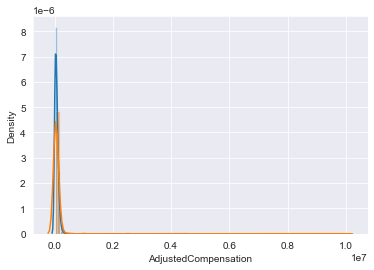

In [14]:
sns.distplot(df11)
sns.distplot(df12)

In [19]:
print('Master compensation mean:{}, Bachelor compensation mean:{}'.format(round(df11.mean()),round(df12.mean())))
print('Master compensation std:{}, Bachelor compensation std:{}'.format(round(df11.std()),round(df12.std())))
print('Welth t-test, p-value:{}'.format(fs.p_value_welch_ttest(df11,df12)))

Master compensation mean:69140.0, Bachelor compensation mean:64887.0
Master compensation std:135527.0, Bachelor compensation std:306936.0
Welth t-test, p-value:0.33077639451272445


In [23]:
#oberseve percentile
for q in np.linspace(.8,1,num=21):
    df11q= round(df11.quantile(q=q),2)
    df12q= round(df12.quantile(q=q),2)
    print('{}th percentile:\tset1:{}\tset2:{}'.format(round(q,2),df11q,df12q))

0.8th percentile:	set1:103000.0	set2:93233.13
0.81th percentile:	set1:107009.0	set2:95572.83
0.82th percentile:	set1:110000.0	set2:99276.38
0.83th percentile:	set1:111503.83	set2:100000.0
0.84th percentile:	set1:115240.4	set2:103040.0
0.85th percentile:	set1:119582.6	set2:105935.04
0.86th percentile:	set1:120000.0	set2:110000.0
0.87th percentile:	set1:124719.88	set2:112000.0
0.88th percentile:	set1:129421.46	set2:115000.0
0.89th percentile:	set1:130000.0	set2:120000.0
0.9th percentile:	set1:135000.0	set2:120346.5
0.91th percentile:	set1:140000.0	set2:126460.0
0.92th percentile:	set1:149640.0	set2:132615.4
0.93th percentile:	set1:150000.0	set2:140000.0
0.94th percentile:	set1:160000.0	set2:143408.8
0.95th percentile:	set1:166778.6	set2:150000.0
0.96th percentile:	set1:180000.0	set2:179849.74
0.97th percentile:	set1:200000.0	set2:195000.0
0.98th percentile:	set1:211100.0	set2:200000.0
0.99th percentile:	set1:250000.0	set2:250000.0
1.0th percentile:	set1:4498900.0	set2:9999999.0


In [33]:
#remove outliers
outlier_threshold=500000
df111 = df1[(df1[a]==a1)&(df1[b]<=outlier_threshold)][b]
df112 = df1[(df1[a]==a2)&(df1[b]<=outlier_threshold)][b]
print('Master compensation mean:{}, Bachelor compensation mean:{}'.format(round(df111.mean()),round(df112.mean())))
print('Master compensation std:{}, Bachelor compensation std:{}'.format(round(df111.std()),round(df112.std())))
print('Welth t-test, p-value:{}'.format(fs.p_value_welch_ttest(df111,df112)))

Master compensation mean:63977.0, Bachelor compensation mean:53744.0
Master compensation std:55341.0, Bachelor compensation std:55285.0
Welth t-test, p-value:4.4874583271514723e-07


/Users/shentaitao/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/shentaitao/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AdjustedCompensation', ylabel='Density'>

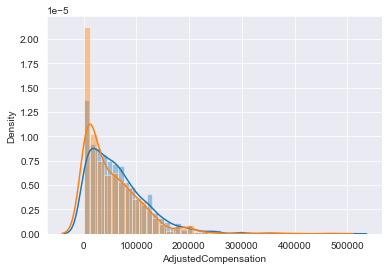

In [34]:
sns.distplot(df111)
sns.distplot(df112)

## Wages and Education II

Now perform a similar statistical test comparing the AdjustedCompensation of those with Bachelor's degrees and those with Doctorates. If you haven't already, be sure to explore the distribution of the AdjustedCompensation feature for any anomalies. 

In [41]:
#Your code here
a3='Doctoral degree'
df13 = df1[df1[a]==a3][b]
df13

22       100000.000
32       172144.440
34       133000.000
61        15000.000
72        43049.736
            ...    
25875     71749.560
25966     12000.000
26012    123553.200
26038    170000.000
26203    200000.000
Name: AdjustedCompensation, Length: 967, dtype: float64

In [42]:
outlier_threshold=500000
df113 = df1[(df1[a]==a3)&(df1[b]<=outlier_threshold)][b]
df112 = df1[(df1[a]==a2)&(df1[b]<=outlier_threshold)][b]
print('Master compensation mean:{}, Bachelor compensation mean:{}'.format(round(df113.mean()),round(df112.mean())))
print('Master compensation std:{}, Bachelor compensation std:{}'.format(round(df113.std()),round(df112.std())))
print('Welth t-test, p-value:{}'.format(fs.p_value_welch_ttest(df113,df112)))

Master compensation mean:86195.0, Bachelor compensation mean:53744.0
Master compensation std:65299.0, Bachelor compensation std:55285.0
Welth t-test, p-value:0.0


/Users/shentaitao/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/shentaitao/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AdjustedCompensation', ylabel='Density'>

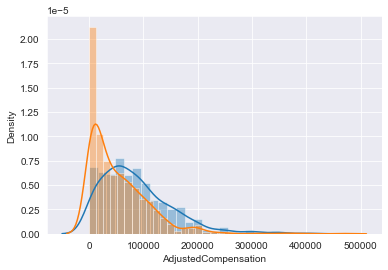

In [43]:
sns.distplot(df113)
sns.distplot(df112)

## Wages and Education III

Remember the multiple comparisons problem; rather than continuing on like this, perform an ANOVA test between the various 'FormalEducation' categories and their relation to 'AdjustedCompensation'.

In [48]:
#Your code here

import statsmodels.api as sm
from statsmodels.formula.api import ols

formula = '{} ~ C({})'.format(b, a)
lm = ols(formula, df).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)
b

                          sum_sq      df         F    PR(>F)
C(FormalEducation)  6.540294e+17     6.0  0.590714  0.738044
Residual            7.999414e+20  4335.0       NaN       NaN


In [50]:
temp = df[df[b]<=5*10**5]
formula = '{} ~ C({})'.format(b, a)
lm = ols(formula, temp).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                          sum_sq      df          F        PR(>F)
C(FormalEducation)  5.841881e+11     6.0  29.224224  1.727132e-34
Residual            1.439270e+13  4320.0        NaN           NaN


## Additional Resources

Here's the original source where the data was taken from:  
    [Kaggle Machine Learning & Data Science Survey 2017](https://www.kaggle.com/kaggle/kaggle-survey-2017)

## Summary

In this lab, you practiced conducting actual hypothesis tests on actual data. From this, you saw how dependent results can be on the initial problem formulation, including preprocessing!